# start with graphframe 

$ find venv/ -name *graphx*.jar

  venv//spark-2.4.4-bin-without-hadoop/jars/spark-graphx_2.11-2.4.4.jar

$ ./dev-scripts/okta_spark jupyter-notebook --packages graphframes:graphframes:0.8.0-spark2.4-s_2.11



## data sources:
* scan 
* coverage-anommaly
* sticky-clients



In [1]:
import pyspark.sql.functions as F
from pyspark.sql.functions import udf, size, avg, count, col,sum, explode
import json

env = "production"
#s3://mist-aggregated-stats-production/aggregated-stats/top_1_time_epoch_by_site_ap_ap2_band/dt=2020-03-14/hr=16/part-00000-76298f84-5414-49c5-88f6-a981ff06d94d-c000.csv .

s3_bucket = "s3://mist-aggregated-stats-{env}/aggregated-stats/".format(env=env)
date_day = "2020-08-11"
hr = '20'

ap_neighbors_path = "top_1_time_epoch_by_site_ap_ap2_band/dt={day}/hr={hr}/*.csv".format(env=env, day=date_day, hr=hr)

ap_neighbors_path = s3_bucket + ap_neighbors_path
print(ap_neighbors_path)



# date_day = "2020-08-11"
# hr = '*'

s3_coverage_bucket = "s3://mist-secorapp-{env}/sle-coverage-anomaly/sle-coverage-anomaly-{env}/".format(env=env)
s3_coverage_path = s3_coverage_bucket + "dt={day}/hr={hr}/*.seq".format(day=date_day, hr=hr)
print(s3_coverage_path)


s3_sticky_bucket = "s3://mist-secorapp-{env}/sticky-client/sticky-client-{env}/".format(env=env)
s3_sticky_path = s3_sticky_bucket + "dt={day}/hr={hr}/*.seq".format(day=date_day, hr=hr)
print(s3_sticky_path)


# user_org_id = "38a18d4d-1623-4985-86d0-1bb06e5e2a48"  # UPS
# user_site_USNYELE = '9aa6ecdb-ddee-41b4-a8d9-872d7962b3c1'  #UPS USNYELE

# # user_org_id = '38a18d4d-1623-4985-86d0-1bb06e5e2a48'  # UPS
# user_site_USFLLON = 'c23667f3-47e9-44aa-9761-de49d34ed9f9' # USFLLON


s3://mist-aggregated-stats-production/aggregated-stats/top_1_time_epoch_by_site_ap_ap2_band/dt=2020-08-11/hr=20/*.csv
s3://mist-secorapp-production/sle-coverage-anomaly/sle-coverage-anomaly-production/dt=2020-08-11/hr=20/*.seq
s3://mist-secorapp-production/sticky-client/sticky-client-production/dt=2020-08-11/hr=20/*.seq


#  coverage-anomaly

In [2]:
# df_coverage_t = sqlContext.read.format('sequencefile').load(s3_coverage_path)
# df_coverage_t.printSchema()

In [3]:
# Coverage-anomaly 
rdd_coverage = spark.sparkContext.sequenceFile(s3_coverage_path)
# rdd_coverage.first()

df_coverage = rdd_coverage.map(lambda x: json.loads(x[1])).toDF() #.map(lambda x: json.loads(x[1])).

df_coverage_0 = df_coverage.filter(col("band")=="5")\
    .select("org", "site", "ap", "anomaly_type", "band", "error_rate", 
            "rssi_mean", "rssi_mean_base", "rssi_deviation", "sle_coverage", "sle_coverage_base", "sle_coverage_anomaly_score")


Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.sequenceFile.
: org.apache.hadoop.fs.s3a.AWSS3IOException: doesBucketExist on mist-secorapp-production: com.amazonaws.services.s3.model.AmazonS3Exception: Bad Request (Service: Amazon S3; Status Code: 400; Error Code: 400 Bad Request; Request ID: 38D72342BA6335E7), S3 Extended Request ID: QgCOLrPsGxomhDA+h1m1UJ7bfWQytTV+8JYXYRtxNGUcBAdKMsluOJKtqY2Tpvw/B9DxZd2W1U0=: Bad Request (Service: Amazon S3; Status Code: 400; Error Code: 400 Bad Request; Request ID: 38D72342BA6335E7)
	at org.apache.hadoop.fs.s3a.S3AUtils.translateException(S3AUtils.java:178)
	at org.apache.hadoop.fs.s3a.S3AFileSystem.verifyBucketExists(S3AFileSystem.java:282)
	at org.apache.hadoop.fs.s3a.S3AFileSystem.initialize(S3AFileSystem.java:236)
	at org.apache.hadoop.fs.FileSystem.createFileSystem(FileSystem.java:2812)
	at org.apache.hadoop.fs.FileSystem.access$200(FileSystem.java:100)
	at org.apache.hadoop.fs.FileSystem$Cache.getInternal(FileSystem.java:2849)
	at org.apache.hadoop.fs.FileSystem$Cache.get(FileSystem.java:2831)
	at org.apache.hadoop.fs.FileSystem.get(FileSystem.java:389)
	at org.apache.hadoop.fs.Path.getFileSystem(Path.java:356)
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:265)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:236)
	at org.apache.hadoop.mapred.SequenceFileInputFormat.listStatus(SequenceFileInputFormat.java:45)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:322)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:204)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.rdd.RDD$$anonfun$take$1.apply(RDD.scala:1343)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.take(RDD.scala:1337)
	at org.apache.spark.api.python.SerDeUtil$.pairRDDToPython(SerDeUtil.scala:239)
	at org.apache.spark.api.python.PythonRDD$.sequenceFile(PythonRDD.scala:250)
	at org.apache.spark.api.python.PythonRDD.sequenceFile(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: com.amazonaws.services.s3.model.AmazonS3Exception: Bad Request (Service: Amazon S3; Status Code: 400; Error Code: 400 Bad Request; Request ID: 38D72342BA6335E7), S3 Extended Request ID: QgCOLrPsGxomhDA+h1m1UJ7bfWQytTV+8JYXYRtxNGUcBAdKMsluOJKtqY2Tpvw/B9DxZd2W1U0=
	at com.amazonaws.http.AmazonHttpClient.handleErrorResponse(AmazonHttpClient.java:1182)
	at com.amazonaws.http.AmazonHttpClient.executeOneRequest(AmazonHttpClient.java:770)
	at com.amazonaws.http.AmazonHttpClient.executeHelper(AmazonHttpClient.java:489)
	at com.amazonaws.http.AmazonHttpClient.execute(AmazonHttpClient.java:310)
	at com.amazonaws.services.s3.AmazonS3Client.invoke(AmazonS3Client.java:3785)
	at com.amazonaws.services.s3.AmazonS3Client.headBucket(AmazonS3Client.java:1107)
	at com.amazonaws.services.s3.AmazonS3Client.doesBucketExist(AmazonS3Client.java:1070)
	at org.apache.hadoop.fs.s3a.S3AFileSystem.verifyBucketExists(S3AFileSystem.java:276)
	... 40 more


In [4]:
df_coverage_0.show(5)

+--------------------+--------------------+-----------------+------------+----+--------------------+------------------+-------------------+-------------------+--------------------------+
|                 org|                site|               ap|anomaly_type|band|          error_rate|         rssi_mean|     rssi_mean_base|     rssi_deviation|sle_coverage_anomaly_score|
+--------------------+--------------------+-----------------+------------+----+--------------------+------------------+-------------------+-------------------+--------------------------+
|f5451dc6-aa80-4d1...|7437fc58-ba7b-4ab...|5c-5b-35-2e-37-f0| weak_signal|   5|0.010864795973949262|-70.39413680781759| -65.07600722474236| 0.8070299212447621|         2.057576484027667|
|bbb101eb-b62d-4fb...|9e3d23b9-9db7-4d8...|5c-5b-35-af-1a-d0| weak_signal|   5|   0.012877031230383| -69.3249686323714|-63.011177533550565|0.15613860330362775|        2.6553445088291014|
|d9ca39f2-a2cd-40a...|cfe2e774-d89a-450...|d4-20-b0-80-fe-6f| wea

In [5]:

# df_coverage = spark.read.format("sequenceFile")\
#    .option("header", "true")\
#    .option("inferSchema", "true")\
#    .load(s3_coverage_path)
# df_coverage.createOrReplaceTempView("sequenceFile")
# df_Schema = df_scan.schema



# rrm-graph

In [6]:
# rdd_ap_neigbhors = spark.sparkContext.textFile(ap_neighbors_path)
# rdd_ap_neigbhors.take(3)

In [7]:
# rdd_rrm_local.map(lambda line: (line.split(',')[0], line.split(',')[1])).collect()

In [8]:

df_scan = spark.read.format("csv")\
   .option("header", "true")\
   .option("inferSchema", "true")\
   .load(ap_neighbors_path)
df_scan.createOrReplaceTempView("scan_data")
df_Schema = df_scan.schema

In [9]:
df_Schema

StructType(List(StructField(site,StringType,true),StructField(ap,StringType,true),StructField(ap2,StringType,true),StructField(band,IntegerType,true),StructField(time_epoch,IntegerType,true),StructField(rssi,DoubleType,true)))

In [10]:
df_scan.show()

+--------------------+------------+------------+----+----------+-----+
|                site|          ap|         ap2|band|time_epoch| rssi|
+--------------------+------------+------------+----+----------+-----+
|0000063a-a4ce-409...|d420b000ee16|d420b000ee07|   5|1597092510|-68.0|
|0000063a-a4ce-409...|d420b000ee5c|d420b000ee7f|  24|1597092493|-54.0|
|0000063a-a4ce-409...|d420b000ee70|d420b000ee20|  24|1597092511|-56.0|
|0000063a-a4ce-409...|d420b080eb69|d420b080eb37|   5|1597092479|-56.0|
|000cb16d-91d5-42e...|5c5b35505c85|        null|  24|1597092441|-74.0|
|000e9e7e-d400-4b2...|5c5b352e7328|5c5b352e73a0|   5|1597092495|-62.0|
|0014d8a6-dfa0-4f3...|d420b0804df3|d420b08030b1|   5|1597092510|-44.0|
|00193f17-4e86-476...|5c5b35aed886|5c5b35aed877|   5|1597092481|-74.0|
|00226d33-cd80-4b1...|5c5b35502003|5c5b35506d24|  24|1597092473|-61.0|
|00272816-8dc2-4f1...|5c5b357f32c7|5c5b35ae6df6|   5|1597092491|-72.0|
|00272816-8dc2-4f1...|5c5b357f3308|5c5b35ae6c89|  24|1597092176|-71.0|
|00272

In [11]:
df_scan.describe().show()

+-------+--------------------+------------+------------+------------------+--------------------+------------------+
|summary|                site|          ap|         ap2|              band|          time_epoch|              rssi|
+-------+--------------------+------------+------------+------------------+--------------------+------------------+
|  count|             3555639|     3555639|     3291690|           3555639|             3555639|           3555639|
|   mean|                null|        null|        null|16.190116319457626|1.5970923231360433E9|-66.08483763396677|
| stddev|                null|        null|        null| 9.348450748950679|   511.4168608160232| 8.199924671641448|
|    min|0000063a-a4ce-409...|5c5b350e01c7|5c5b350e0090|                 5|          1597089600|            -112.0|
|    max|fffca7ff-4d2f-455...|d420b0c12660|d420b0c12660|                24|          1597092774|             -11.0|
+-------+--------------------+------------+------------+----------------

In [12]:
df_scan.count()

3555639

# test-site

In [13]:
site_id = "5e8fe474-a9ee-4d01-a2b6-b022b0f9c869"  # GEG1 , AmazonOTFC-prod

site_id = "a7092875-257f-43f3-9514-ca1ab688bec0" # Sam's club. 4989

In [14]:
# site_id = "d1ee1d22-4b55-4c97-97c4-9d757144f45b"
df_coverage_site = df_coverage_0.filter(col("site")==site_id)
print("count", df_coverage_site.count() )
df_coverage_site.show()

count 3
+--------------------+--------------------+-----------------+------------+----+--------------------+------------------+-------------------+--------------------+--------------------------+
|                 org|                site|               ap|anomaly_type|band|          error_rate|         rssi_mean|     rssi_mean_base|      rssi_deviation|sle_coverage_anomaly_score|
+--------------------+--------------------+-----------------+------------+----+--------------------+------------------+-------------------+--------------------+--------------------------+
|604411f1-4e45-4be...|a7092875-257f-43f...|5c-5b-35-ae-16-9e| weak_signal|   5|0.010126083001575486|-77.00986842105263| -67.16922138000217| 0.45855836801695327|          3.36194679977107|
|604411f1-4e45-4be...|a7092875-257f-43f...|5c-5b-35-ae-1d-2e| weak_signal|   5|0.020779159954802066|-73.04878048780488|-62.123085469732224|-0.00699166745647...|        3.5803045403638865|
|604411f1-4e45-4be...|a7092875-257f-43f...|5c-5b-35-

In [15]:
from pyspark.sql.types import IntegerType, FloatType, StringType

def mac_format(mac):
    return mac.replace("-", "")
mac_format = udf(mac_format, StringType())

df_coverage_site= df_coverage_site.withColumn("ap", mac_format(col("ap")))
df_coverage_site.show(3)                           

+--------------------+--------------------+------------+------------+----+--------------------+------------------+-------------------+--------------------+--------------------------+
|                 org|                site|          ap|anomaly_type|band|          error_rate|         rssi_mean|     rssi_mean_base|      rssi_deviation|sle_coverage_anomaly_score|
+--------------------+--------------------+------------+------------+----+--------------------+------------------+-------------------+--------------------+--------------------------+
|604411f1-4e45-4be...|a7092875-257f-43f...|5c5b35ae169e| weak_signal|   5|0.010126083001575486|-77.00986842105263| -67.16922138000217| 0.45855836801695327|          3.36194679977107|
|604411f1-4e45-4be...|a7092875-257f-43f...|5c5b35ae1d2e| weak_signal|   5|0.020779159954802066|-73.04878048780488|-62.123085469732224|-0.00699166745647...|        3.5803045403638865|
|604411f1-4e45-4be...|a7092875-257f-43f...|5c5b35ae1d24| weak_signal|   5|  0.6411848

In [16]:
df_scan_site = df_scan.filter(col('site')==site_id)

print("count", df_scan_site.count())

df_scan_site.show()

count 885
+--------------------+------------+------------+----+----------+-----+
|                site|          ap|         ap2|band|time_epoch| rssi|
+--------------------+------------+------------+----+----------+-----+
|a7092875-257f-43f...|5c5b35ae1680|d420b0000cb7|  24|1597091906|-69.0|
|a7092875-257f-43f...|5c5b35ae1699|5c5b35ae1d1f|  24|1597092493|-65.0|
|a7092875-257f-43f...|5c5b35ae1941|5c5b35ae1bf3|   5|1597092512|-66.0|
|a7092875-257f-43f...|5c5b35ae1b58|5c5b35ae1cd9|  24|1597091312|-72.0|
|a7092875-257f-43f...|5c5b35ae1cb1|5c5b35ae1bfd|  24|1597092482|-58.0|
|a7092875-257f-43f...|5c5b35ae1d06|5c5b35ae1d92|  24|1597092492|-60.0|
|a7092875-257f-43f...|5c5b35ae1d2e|d420b0000a28|  24|1597092511|-66.0|
|a7092875-257f-43f...|d420b0000bae|5c5b35ae1752|  24|1597092499|-72.0|
|a7092875-257f-43f...|d420b0000cd5|5c5b35ae1699|  24|1597092482|-72.0|
|a7092875-257f-43f...|5c5b35ae169e|5c5b35ae1d24|  24|1597092468|-71.0|
|a7092875-257f-43f...|5c5b35ae1bfd|5c5b35ae1752|  24|1597092482|-68

In [17]:
# df_scan_site.select("ap").groupBy("ap").count().show()

df_scan_site.select(F.countDistinct("ap")).show()



+------------------+
|count(DISTINCT ap)|
+------------------+
|                41|
+------------------+



In [18]:
df_scan_site.select(F.countDistinct("ap2")).show()


+-------------------+
|count(DISTINCT ap2)|
+-------------------+
|                 40|
+-------------------+



In [19]:
df_scan_site.select(F.countDistinct("ap", "ap2")).show()

+-----------------------+
|count(DISTINCT ap, ap2)|
+-----------------------+
|                    531|
+-----------------------+



# GraphFrames
The following command creates your first GraphFrame. The GraphFrame accepts two DataFrames as inputs—vertices and edges. GraphFrames like to have a naming convention in the column name, which you need to follow. Those rules are defined as follows:
* A DataFrame that represents vertices should contain a column named id. Here, personsDf contains a column name "id".

* A DataFrame that represents edges should contain columns named src and dst. Here, reationshipDf contains the columns "src" and "dst".

In [20]:
df_scan_site.show(3)
df_coverage_site.show(2)

+--------------------+------------+------------+----+----------+-----+
|                site|          ap|         ap2|band|time_epoch| rssi|
+--------------------+------------+------------+----+----------+-----+
|a7092875-257f-43f...|5c5b35ae1680|d420b0000cb7|  24|1597091906|-69.0|
|a7092875-257f-43f...|5c5b35ae1699|5c5b35ae1d1f|  24|1597092493|-65.0|
|a7092875-257f-43f...|5c5b35ae1941|5c5b35ae1bf3|   5|1597092512|-66.0|
+--------------------+------------+------------+----+----------+-----+
only showing top 3 rows

+--------------------+--------------------+------------+------------+----+--------------------+------------------+-------------------+--------------------+--------------------------+
|                 org|                site|          ap|anomaly_type|band|          error_rate|         rssi_mean|     rssi_mean_base|      rssi_deviation|sle_coverage_anomaly_score|
+--------------------+--------------------+------------+------------+----+--------------------+-----------------

In [21]:
df_scan_site.show()

+--------------------+------------+------------+----+----------+-----+
|                site|          ap|         ap2|band|time_epoch| rssi|
+--------------------+------------+------------+----+----------+-----+
|a7092875-257f-43f...|5c5b35ae1680|d420b0000cb7|  24|1597091906|-69.0|
|a7092875-257f-43f...|5c5b35ae1699|5c5b35ae1d1f|  24|1597092493|-65.0|
|a7092875-257f-43f...|5c5b35ae1941|5c5b35ae1bf3|   5|1597092512|-66.0|
|a7092875-257f-43f...|5c5b35ae1b58|5c5b35ae1cd9|  24|1597091312|-72.0|
|a7092875-257f-43f...|5c5b35ae1cb1|5c5b35ae1bfd|  24|1597092482|-58.0|
|a7092875-257f-43f...|5c5b35ae1d06|5c5b35ae1d92|  24|1597092492|-60.0|
|a7092875-257f-43f...|5c5b35ae1d2e|d420b0000a28|  24|1597092511|-66.0|
|a7092875-257f-43f...|d420b0000bae|5c5b35ae1752|  24|1597092499|-72.0|
|a7092875-257f-43f...|d420b0000cd5|5c5b35ae1699|  24|1597092482|-72.0|
|a7092875-257f-43f...|5c5b35ae169e|5c5b35ae1d24|  24|1597092468|-71.0|
|a7092875-257f-43f...|5c5b35ae1bfd|5c5b35ae1752|  24|1597092482|-68.0|
|a7092

In [22]:
# 
df_scan_site_2 = df_scan_site.join(df_coverage_site, [df_scan_site.ap==df_coverage_site.ap], "inner")
df_scan_site_2.show(3)

+--------------------+------------+------------+----+----------+-----+--------------------+--------------------+------------+------------+----+------------------+------------------+-----------------+------------------+--------------------------+
|                site|          ap|         ap2|band|time_epoch| rssi|                 org|                site|          ap|anomaly_type|band|        error_rate|         rssi_mean|   rssi_mean_base|    rssi_deviation|sle_coverage_anomaly_score|
+--------------------+------------+------------+----+----------+-----+--------------------+--------------------+------------+------------+----+------------------+------------------+-----------------+------------------+--------------------------+
|a7092875-257f-43f...|5c5b35ae1d24|5c5b35ae1bf3|  24|1597092474|-58.0|604411f1-4e45-4be...|a7092875-257f-43f...|5c5b35ae1d24| weak_signal|   5|0.6411848927014075|-72.80392156862744|-65.9216991745592|0.6249425973728994|        4.5419269431648575|
|a7092875-257f-4

In [23]:
vertices= df_scan_site.selectExpr("ap as id").distinct()
vertices.show(3)

vertices_2 = vertices.join(df_coverage_site, [vertices.id==df_coverage_site.ap], "inner")
vertices_2.show(3)

+------------+
|          id|
+------------+
|5c5b35ae1d24|
|5c5b35ae1680|
|5c5b35ae1d2e|
+------------+
only showing top 3 rows

+------------+--------------------+--------------------+------------+------------+----+--------------------+------------------+-------------------+--------------------+--------------------------+
|          id|                 org|                site|          ap|anomaly_type|band|          error_rate|         rssi_mean|     rssi_mean_base|      rssi_deviation|sle_coverage_anomaly_score|
+------------+--------------------+--------------------+------------+------------+----+--------------------+------------------+-------------------+--------------------+--------------------------+
|5c5b35ae1d24|604411f1-4e45-4be...|a7092875-257f-43f...|5c5b35ae1d24| weak_signal|   5|  0.6411848927014075|-72.80392156862744|  -65.9216991745592|  0.6249425973728994|        4.5419269431648575|
|5c5b35ae1d2e|604411f1-4e45-4be...|a7092875-257f-43f...|5c5b35ae1d2e| weak_signal|   5

In [24]:
vertices.count(), vertices_2.count()

(41, 3)

In [25]:
vertices_3 = vertices.join(df_coverage_site, [vertices.id==df_coverage_site.ap], how='left')
vertices_3.show(3)
vertices_3.count()
vertices_3.select("id", "sle_coverage_anomaly_score").show(41)

+------------+--------------------+--------------------+------------+------------+----+--------------------+------------------+-------------------+--------------------+--------------------------+
|          id|                 org|                site|          ap|anomaly_type|band|          error_rate|         rssi_mean|     rssi_mean_base|      rssi_deviation|sle_coverage_anomaly_score|
+------------+--------------------+--------------------+------------+------------+----+--------------------+------------------+-------------------+--------------------+--------------------------+
|5c5b35ae1d24|604411f1-4e45-4be...|a7092875-257f-43f...|5c5b35ae1d24| weak_signal|   5|  0.6411848927014075|-72.80392156862744|  -65.9216991745592|  0.6249425973728994|        4.5419269431648575|
|5c5b35ae1680|                null|                null|        null|        null|null|                null|              null|               null|                null|                      null|
|5c5b35ae1d2e|604411

In [26]:
vertices_4 = vertices.join(df_coverage_site, [vertices.id==df_coverage_site.ap], how='right')
# vertices_4.show(3)
vertices_4.count()
vertices_4.select("id", "sle_coverage_anomaly_score").show(41)

+------------+--------------------+--------------------+------------+------------+----+--------------------+------------------+-------------------+--------------------+--------------------------+
|          id|                 org|                site|          ap|anomaly_type|band|          error_rate|         rssi_mean|     rssi_mean_base|      rssi_deviation|sle_coverage_anomaly_score|
+------------+--------------------+--------------------+------------+------------+----+--------------------+------------------+-------------------+--------------------+--------------------------+
|5c5b35ae1d24|604411f1-4e45-4be...|a7092875-257f-43f...|5c5b35ae1d24| weak_signal|   5|  0.6411848927014075|-72.80392156862744|  -65.9216991745592|  0.6249425973728994|        4.5419269431648575|
|5c5b35ae1d2e|604411f1-4e45-4be...|a7092875-257f-43f...|5c5b35ae1d2e| weak_signal|   5|0.020779159954802066|-73.04878048780488|-62.123085469732224|-0.00699166745647...|        3.5803045403638865|
|5c5b35ae169e|604411

In [27]:
# vertices_3.select("id", "sle_coverage_anomaly_score").show(41)
# vertices_3= vertices_3.selectExpr("ap as id")

In [28]:
# vertices_3.show()

In [29]:
# vertices= df_scan_site.selectExpr("ap as id").distinct()

In [30]:
# vertices.show(5)
# df_scan_site.show(5)

In [76]:
edges=df_scan_site.filter(col("rssi")>-68)\
    .select("ap", "ap2", "rssi").groupBy("ap", "ap2").agg(F.max("rssi").alias("weight"))\
    .selectExpr("ap as src", "ap2 as dst", "weight")

edges.show(5)

+------------+------------+------+
|         src|         dst|weight|
+------------+------------+------+
|5c5b35ae1699|5c5b35ae1cd9| -62.0|
|5c5b35ae1d3d|5c5b35ae1699| -63.0|
|5c5b35ae1b58|5c5b35ae1bfd| -64.0|
|5c5b35ae1d3d|5c5b35ae1d24| -57.0|
|d420b0000c67|5c5b35ae1d3d| -58.0|
+------------+------------+------+
only showing top 5 rows



In [ ]:
# enrich vertices

In [ ]:
edges.count()
# vertices_3.count(), edges.count()/vertices_3.count()

In [77]:
# edges.show()
edges.filter(col("src")==ap203).show(50)

+------------+------------+------+
|         src|         dst|weight|
+------------+------------+------+
|5c5b35ae16bc|5c5b35ae1b7b| -65.0|
|5c5b35ae16bc|5c5b35ae1bfd| -67.0|
|5c5b35ae16bc|5c5b35ae1752| -54.0|
|5c5b35ae16bc|5c5b35ae1bf3| -67.0|
|5c5b35ae16bc|5c5b35ae1941| -57.0|
|5c5b35ae16bc|5c5b35ae1d38| -65.0|
|5c5b35ae16bc|        null| -62.0|
|5c5b35ae16bc|5c5b35ae1cf7| -61.0|
|5c5b35ae16bc|5c5b35ae1ce3| -60.0|
|5c5b35ae16bc|5c5b35ae1cb1| -65.0|
+------------+------------+------+



In [67]:
# df_scan_site.filter(col("rssi")>-68).select("ap", "ap2", "rssi").groupBy("ap", "ap2").agg(F.max("rssi").alias("weight")).show()

+------------+------------+------+
|          ap|         ap2|weight|
+------------+------------+------+
|5c5b35ae1699|5c5b35ae1cd9| -62.0|
|5c5b35ae1d3d|5c5b35ae1699| -63.0|
|5c5b35ae1b58|5c5b35ae1bfd| -64.0|
|5c5b35ae1d3d|5c5b35ae1d24| -57.0|
|d420b0000c67|5c5b35ae1d3d| -58.0|
|5c5b35ae1bf3|5c5b35ae1d24| -64.0|
|d420b0000cf8|5c5b35ae1d1f| -62.0|
|5c5b35ae1cf7|5c5b35ae1bfd| -67.0|
|5c5b35ae1d1f|5c5b35ae1d2e| -53.0|
|5c5b35ae16e4|5c5b35ae1757| -63.0|
|5c5b35ae1b67|d420b0000cb7| -66.0|
|5c5b35ae1bf3|5c5b35ae18a1| -59.0|
|d420b0000d57|5c5b35ae1d3d| -60.0|
|5c5b35ae1d10|5c5b35ae1d92| -59.0|
|5c5b35ae1d24|        null| -67.0|
|d420b0000bae|5c5b35ae1da1| -41.0|
|5c5b35ae1d3d|5c5b35ae1bfd| -61.0|
|5c5b35ae1680|5c5b35ae1b67| -59.0|
|5c5b35ae1cd9|5c5b35ae1699| -62.0|
|5c5b35ae1d24|5c5b35ae1bfd| -61.0|
+------------+------------+------+
only showing top 20 rows



In [78]:
from graphframes import *
g = GraphFrame(vertices_3, edges)

In [79]:
g.vertices.show()
g.edges.show()
## Check the number of edges of each vertex
g.degrees.show()

+------------+--------------------+--------------------+------------+------------+----+--------------------+------------------+-------------------+--------------------+--------------------------+
|          id|                 org|                site|          ap|anomaly_type|band|          error_rate|         rssi_mean|     rssi_mean_base|      rssi_deviation|sle_coverage_anomaly_score|
+------------+--------------------+--------------------+------------+------------+----+--------------------+------------------+-------------------+--------------------+--------------------------+
|5c5b35ae1d24|604411f1-4e45-4be...|a7092875-257f-43f...|5c5b35ae1d24| weak_signal|   5|  0.6411848927014075|-72.80392156862744|  -65.9216991745592|  0.6249425973728994|        4.5419269431648575|
|5c5b35ae1680|                null|                null|        null|        null|null|                null|              null|               null|                null|                      null|
|5c5b35ae1d2e|604411

In [80]:
display(g)

GraphFrame(v:[id: string, org: string ... 9 more fields], e:[src: string, dst: string ... 1 more field])

In [81]:
aps = vertices.select("id").collect()
ap1 = aps[0][0]

In [82]:
# The following code gets the number of incoming links to Andrew. This is obtained by calling the inDegrees method.
filter_query= "id ='{}'".format(ap1)
g.degrees.filter(filter_query).show()

+------------+------+
|          id|degree|
+------------+------+
|5c5b35ae1d24|    19|
+------------+------+



In [83]:
# The following code shows how to get the number of links coming out from Andrew using the outDegrees method .

# g.outDegrees.filter("id = '5c5b3552b5e3'").show()

ap203 = "5c5b35ae16bc"

g.degrees.filter("id ='{}'".format(ap203)).show()

+------------+------+
|          id|degree|
+------------+------+
|5c5b35ae16bc|    19|
+------------+------+



In [85]:
# g.edges.filter("id ='{}'".format(ap203))

AnalysisException: "cannot resolve '`id`' given input columns: [src, dst, weight]; line 1 pos 0;\n'Filter ('id = 5c5b35ae16bc)\n+- Project [ap#178 AS src#3117, ap2#179 AS dst#3118, weight#3113]\n   +- Aggregate [ap#178, ap2#179], [ap#178, ap2#179, max(rssi#182) AS weight#3113]\n      +- Project [ap#178, ap2#179, rssi#182]\n         +- Filter (rssi#182 > cast(-68 as double))\n            +- Filter (site#177 = a7092875-257f-43f3-9514-ca1ab688bec0)\n               +- Relation[site#177,ap#178,ap2#179,band#180,time_epoch#181,rssi#182] csv\n"

In [40]:
sc.setCheckpointDir('graphframes_cps')


In [41]:
ranks = g.pageRank(resetProbability=0.10, maxIter=5)
# display(ranks.vertices.select("id","pagerank").orderBy(desc("pagerank")))


In [42]:
display(ranks.vertices)
display(ranks.edges)

DataFrame[id: string, org: string, site: string, ap: string, anomaly_type: string, band: string, error_rate: double, rssi_mean: double, rssi_mean_base: double, rssi_deviation: double, sle_coverage_anomaly_score: double, pagerank: double]

DataFrame[src: string, dst: string, weight: double, weight: double]

In [43]:
vertices.show()

+------------+
|          id|
+------------+
|5c5b35ae1d24|
|5c5b35ae1680|
|5c5b35ae1d2e|
|5c5b35ae1ed2|
|d420b0000c35|
|5c5b35ae1d1f|
|5c5b35ae1d10|
|d420b0000cd5|
|5c5b35ae1d38|
|d420b0000c67|
|d420b0000cf8|
|5c5b35ae1ce3|
|5c5b35ae1b80|
|5c5b35ae1757|
|5c5b35ae1699|
|5c5b35ae1bf3|
|5c5b35ae1d06|
|5c5b35ae169e|
|5c5b35ae1752|
|5c5b35ae1b58|
+------------+
only showing top 20 rows



In [44]:
# vertices.show()
# xap_s

In [45]:
# Search from "Esther" for users of age < 32.

# ap1 = "5c5b3552b96c"
# ap2 = "5c5b3552b5e3"
# paths = g.bfs("id = ap1", "id = ap2")
# paths.show()

# # Specify edge filters or max path lengths.
# g.bfs("id = ap1", "id = ap2",\
#   edgeFilter="rssi > -75", maxPathLength=3)


In [46]:
# g.connectedComponents()

stronglyConnectedComponents = g.stronglyConnectedComponents(maxIter=10)
# stronglyConnectedComponents = g.stronglyConnectedComponents(maxIter=10)
# stronglyConnectedComponents.select("id", "component").orderBy("component").show()
stronglyConnectedComponents.show()

+------------+--------------------+--------------------+------------+------------+----+--------------------+------------------+-------------------+--------------------+--------------------------+------------+
|          id|                 org|                site|          ap|anomaly_type|band|          error_rate|         rssi_mean|     rssi_mean_base|      rssi_deviation|sle_coverage_anomaly_score|   component|
+------------+--------------------+--------------------+------------+------------+----+--------------------+------------------+-------------------+--------------------+--------------------------+------------+
|5c5b35ae16bc|                null|                null|        null|        null|null|                null|              null|               null|                null|                      null| 77309411328|
|d420b0000ce9|                null|                null|        null|        null|null|                null|              null|               null|                n

In [47]:
# result1.

In [48]:

# result2.select("id", "component").orderBy("component").show()


In [49]:
# result2

In [50]:
# dir(result2)

In [51]:
stronglyConnectedComponents.select("component").groupBy("component").count().orderBy("count").show()

+-------------+-----+
|    component|count|
+-------------+-----+
| 627065225216|    1|
|1486058684417|    1|
| 455266533377|    1|
|  77309411328|   38|
+-------------+-----+



In [52]:
# result2.show()
stronglyConnectedComponents.count()

41

In [53]:
# dir(g)

In [54]:
connectedComponents = g.connectedComponents()
# result2.select("id", "component").orderBy("component").show()
connectedComponents.show()

+------------+--------------------+--------------------+------------+------------+----+--------------------+------------------+-------------------+--------------------+--------------------------+-----------+
|          id|                 org|                site|          ap|anomaly_type|band|          error_rate|         rssi_mean|     rssi_mean_base|      rssi_deviation|sle_coverage_anomaly_score|  component|
+------------+--------------------+--------------------+------------+------------+----+--------------------+------------------+-------------------+--------------------+--------------------------+-----------+
|5c5b35ae1d24|604411f1-4e45-4be...|a7092875-257f-43f...|5c5b35ae1d24| weak_signal|   5|  0.6411848927014075|-72.80392156862744|  -65.9216991745592|  0.6249425973728994|        4.5419269431648575|77309411328|
|5c5b35ae1680|                null|                null|        null|        null|null|                null|              null|               null|                null|

In [55]:
connectedComponents.select("ap", "component").show(connectedComponents.count())  #.groupBy("component").count().orderBy("count").show()

+------------+-----------+
|          ap|  component|
+------------+-----------+
|5c5b35ae1d24|77309411328|
|        null|77309411328|
|5c5b35ae1d2e|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|5c5b35ae169e|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|        null|77309411328|
|

In [56]:
vertices_2.select("ap").count()

3

In [57]:
g.vertices.select("ap").count()

41

In [58]:
date_day + hr

'2020-08-1020'

In [59]:
s3_out_bucket = "s3://mist-test-bucket/wenfeng/{}/hr={}".format(date_day, hr)  #top_1_time_epoch_by_site_ap_ap2_band/{}/{}/".format(date_day, hr)
s3_out_bucket_vertices = s3_out_bucket #+ "vertices/"
s3_out_bucket_edges = s3_out_bucket #+ "edges/"

print(s3_out_bucket_vertices, s3_out_bucket_edges)
g.vertices.write.mode("overwrite").parquet(s3_out_bucket_vertices)
g.edges.write.mode("overwrite").parquet(s3_out_bucket_vertices)
# s3_out_bucket


s3://mist-test-bucket/wenfeng/2020-08-10/hr=20 s3://mist-test-bucket/wenfeng/2020-08-10/hr=20


In [60]:
# s3_out_bucket, rrm_local_path

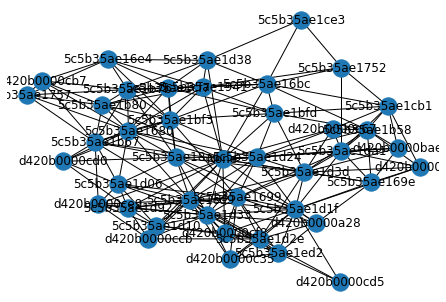

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline 

import networkx as nx
gp = nx.from_pandas_edgelist(edges.toPandas(),'src','dst')
nx.draw(gp, with_labels = True)

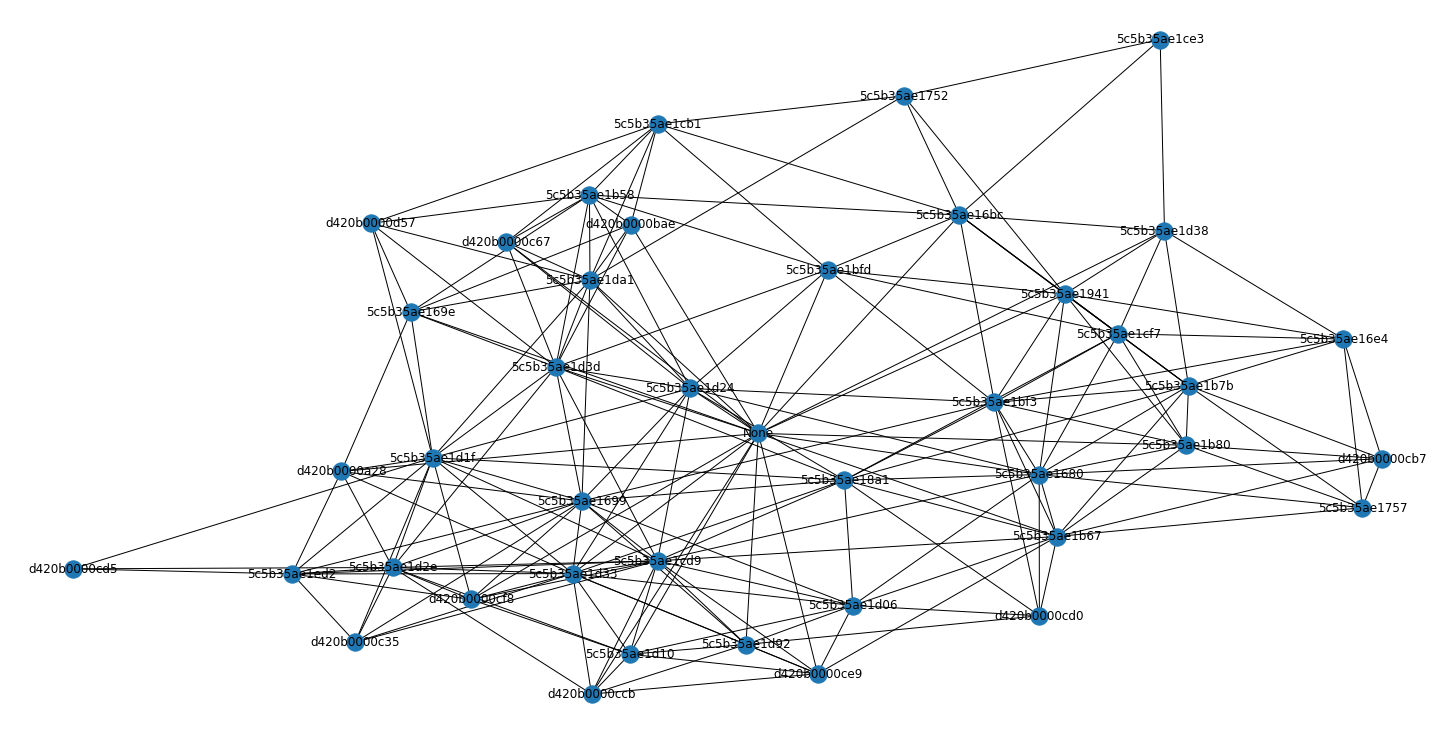

In [62]:
# plt.figsize(15, 20)
plt.figure(figsize=(20,10)) 
nx.draw(gp, with_labels = True)

In [63]:
ver

NameError: name 'ver' is not defined

In [ ]:
g.persist()

In [ ]:
# graph.degrees.filter("id = 1").show()

In [ ]:
# GraphFrame provides the following built-in algorithms:
# Connected components

# Label propagation

# PageRank

# SVD++

# Shortest Path

# Strongly connected components

# Triangle count

In [2]:
import networkx as nx
mist_g = nx.read_gpickle("../../mist-rrm-exp/test-notebooks/mistG_sams_4989.gpickle")


In [3]:
# df_coverage_site = df_coverage_0.filter(col("site")==site_id)
df_coverage_site.show(0)

NameError: name 'df_coverage_site' is not defined